In [26]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('data.csv')

# Perimeter_data
perimeter_data = data[['diagnosis','perimeter_mean', 'perimeter_se', 'perimeter_worst']]
diagnosis = pd.get_dummies(perimeter_data['diagnosis'], drop_first=True) #One hot encoding diagnosis
perimeter_data = pd.concat([perimeter_data, diagnosis], axis=1)
perimeter_data.drop(columns= ["diagnosis"], axis=1,inplace=True)

# Data normalization
#x = perimeter_data.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#perimeter_data = pd.DataFrame(x_scaled)

y = perimeter_data["M"]
X = perimeter_data.drop(columns=["M"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9166666666666666

[]

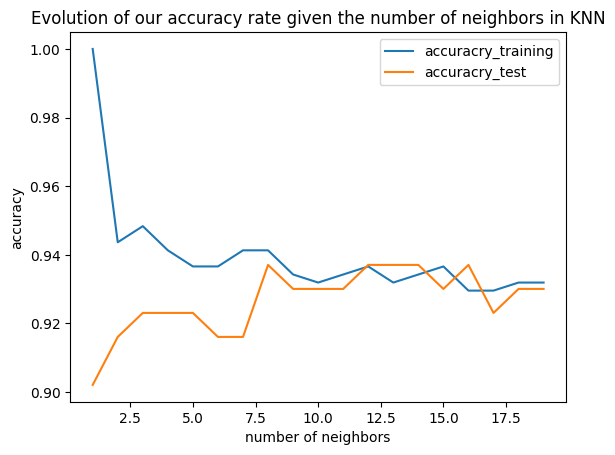

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

#IsNull
data.isna().sum()

#Data types
data.dtypes
ignore = ['diagnosis']
f_data = (data.set_index(ignore, append=True)
        .astype(float)
        .reset_index(ignore))

perimeter_data = f_data[['diagnosis','perimeter_mean', 'perimeter_se', 'perimeter_worst']]

diagnosis = pd.get_dummies(perimeter_data['diagnosis'], drop_first=True) #One hot encoding sex
perimeter_data = pd.concat([perimeter_data, diagnosis], axis=1)
perimeter_data.drop(columns= ["diagnosis"], axis=1,inplace=True)

y = perimeter_data["M"]
X = perimeter_data.drop(columns=["M"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

hyperparam = [i for i in range(1,20)]
accuracy_training = []
accuracy_test = []

for k in hyperparam:
    #Training set
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_training.append(accuracy_score(y_train, y_pred))
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    
plt.plot(hyperparam, accuracy_training, label = "accuracry_training" )
plt.plot(hyperparam, accuracy_test, label = "accuracry_test" )
plt.title("Evolution of our accuracy rate given the number of neighbors in KNN")
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.plot()

# Iteration 2, 

In [28]:
#Explain why I choose my columns iteration 2

# Data normalization ? What is
#x = perimeter_data.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)m
#perimeter_data = pd.DataFrame(x_scaled)

KNN (accuracy) 0.965034965034965
KNN (f1_score) : 0.9411764705882352
KNN (roc) : 0.9551162790697674
SVM: (accuracy) 0.972027972027972
SVM: (f1_score) 0.9534883720930233
SVM: (roc) 0.9667441860465116
Decision Tree (accuracy): 0.9300699300699301
Decision Tree (f1_score): 0.878048780487805
Decision Tree (roc) : 0.9036046511627908


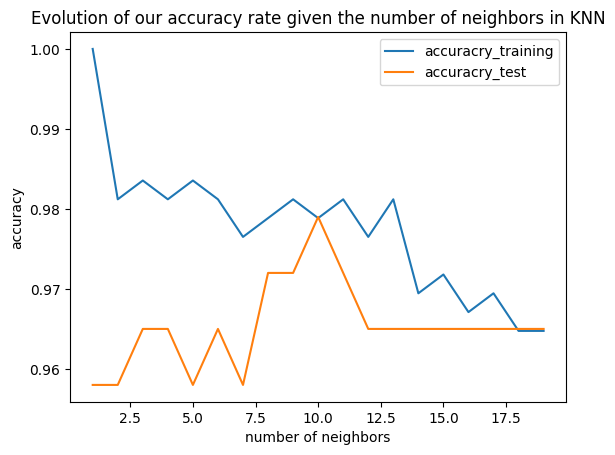

In [29]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
import random
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


data = pd.read_csv('data.csv')

#IsNull
data.isna().sum()

#Data types
data.dtypes
ignore = ['diagnosis']
f_data = (data.set_index(ignore, append=True)
        .astype(float)
        .reset_index(ignore))

cleanData = f_data.drop(['fractal_dimension_worst', 'fractal_dimension_se', 'fractal_dimension_mean', 'id', 'area_se', 'Unnamed: 32'], axis=1)
# sns.heatmap(cleanData.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt=".2f")

diagnosis = pd.get_dummies(cleanData['diagnosis'], drop_first=True) #One hot encoding diagnosis
cleanData = pd.concat([cleanData, diagnosis], axis=1)
cleanData.drop(columns= ["diagnosis"], axis=1,inplace=True)

x = cleanData.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cleanData = pd.DataFrame(x_scaled)

y = cleanData[26]
X = cleanData.drop(columns=[26])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("KNN (accuracy)", accuracy_score(y_test, y_pred))
print("KNN (f1_score) :", f1_score(y_test, y_pred))
print("KNN (roc) :", roc_auc_score(y_test, y_pred))
hyperparam = [i for i in range(1,20)]
accuracy_training = []
accuracy_test = []

for k in hyperparam:
    #Training set
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_training.append(accuracy_score(y_train, y_pred))
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_pred))

plt.plot(hyperparam, accuracy_training, label = "accuracry_training" )
plt.plot(hyperparam, accuracy_test, label = "accuracry_test" )
plt.title("Evolution of our accuracy rate given the number of neighbors in KNN")
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.plot()

model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SVM: (accuracy)", accuracy_score(y_test, y_pred))
print("SVM: (f1_score)", f1_score(y_test, y_pred))
print("SVM: (roc)", roc_auc_score(y_test, y_pred))

dtree = DecisionTreeClassifier() 
dtree.fit(X_train, y_train) 
y_pred = dtree.predict(X_test) 
clf = DecisionTreeClassifier() 
clf = clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
print("Decision Tree (accuracy):",accuracy_score(y_test, y_pred))
print("Decision Tree (f1_score):",f1_score(y_test, y_pred))
print("Decision Tree (roc) :", roc_auc_score(y_test, y_pred))


# Iteration 3, Backward Feature Selection